In [ ]:
!pip3 install qiskit

zsh:1: command not found: pip33


In [6]:
!pip3 install qiskit_ibm_runtime

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.4 MB 315 kB/s eta 0:00:01
     |████████████████████████████████| 368 kB 123 kB/s eta 0:00:01
     |████████████████████████████████| 444 kB 668 kB/s eta 0:00:01
     |████████████████████████████████| 7.3 MB 589 kB/s eta 0:00:01
     |████████████████████████████████| 75 kB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 528 kB/s eta 0:00:01
     |████████████████████████████████| 49 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 119 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 130 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 180 kB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 118 kB 2.7 MB/s eta 0:00:01
You should consider upgrading via the '/

In [7]:
!pip3 install pylatexenc

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 162 kB 4.1 MB/s eta 0:00:01
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136833 sha256=55c89e4699f84a214c43bb2cf01813aabbec5d745fa0f95f7ac64f3290308b5a
  Stored in directory: /Users/harshitagarwal/Library/Caches/pip/wheels/a3/68/66/2f15abd0673d83c02f354115feedeb89c3daed2ac319b11090
Successfully built pylatexenc
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [8]:
import matplotlib.pyplot as plt
import qiskit
import pylatexenc

/var/folders/yn/q_cgy5m947g4bj3shsg12lpc0000gn/T/ipykernel_15266/1746812456.py:2: DeprecationWarning: Using Qiskit with Python 3.9 is deprecated as of the 2.1.0 release. Support for running Qiskit with Python 3.9 will be removed in the 2.3.0 release, which coincides with when Python 3.9 goes end of life.
  import qiskit


In [9]:
from qiskit import QuantumCircuit

## Quantum Circuit ->
1 Qubit System

In [10]:
circuit = QuantumCircuit(1, 1)

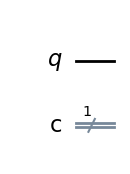

In [11]:
circuit.draw('mpl')

In [12]:
circuit.x(0)

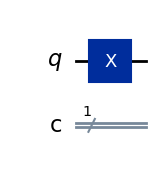

In [13]:
circuit.draw('mpl')

In [14]:
from qiskit.quantum_info import Statevector

In [15]:
Statevector.from_instruction(circuit)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


### Measurement

In [16]:
circuit.measure(0,0)

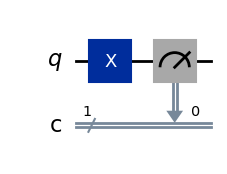

In [17]:
circuit.draw('mpl')

In [18]:
!pip3 install qiskit_aer

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 2.1 MB 3.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [19]:
from qiskit_aer import Aer

In [20]:
from qiskit.visualization import plot_histogram

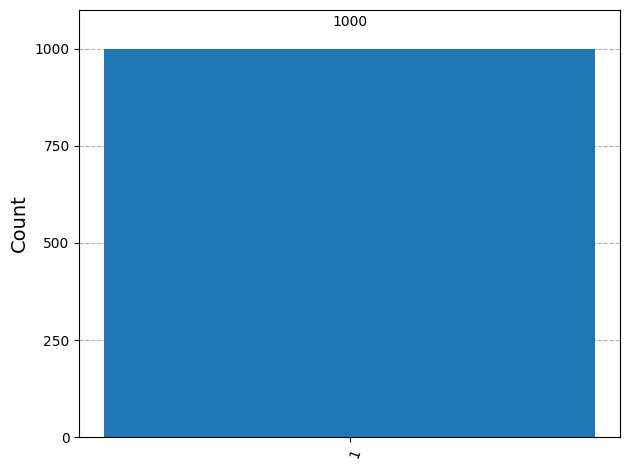

In [21]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(circuit, shots=1000)
counts = job.result().get_counts()
plot_histogram(counts)

In [22]:
from qiskit.transpiler import generate_preset_pass_manager

In [23]:
from qiskit_ibm_runtime import Sampler

/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/var/folders/yn/q_cgy5m947g4bj3shsg12lpc0000gn/T/ipykernel_15266/2018907173.py:1: DeprecationWarning: Using qiskit-ibm-runtime with Python 3.9 is deprecated as of the 0.41.0 release. Support for running qiskit-ibm-runtime with Python 3.9 will be removed in a future release.
  from qiskit_ibm_runtime import Sampler


In [24]:
from qiskit_ibm_runtime import Session

In [25]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [26]:
service = QiskitRuntimeService.save_account(
    token="oelMxEhQNiHqszrPGRh3IbNg9iMj67-tD88LsI1COwY7",
    instance="crn:v1:bluemix:public:quantum-computing:us-east:a/cccd6a0d66014c88bba0568bcfb0a559:f759b0ba-e0ba-4c32-8498-7566ed8f728d::",
    plans_preference=['open'],
    region="us-east",
    name="Harshit Agarwal",
    set_as_default=True,
    overwrite=True,
)

In [27]:
service = QiskitRuntimeService()

management.get:WARNING:2025-10-05 21:49:47,565: Loading default saved account


In [28]:
print(service)

<QiskitRuntimeService>


In [29]:
backend_real = service.least_busy(simulator=False,operational=True)

In [30]:
backend_real

<IBMBackend('ibm_torino')>

In [31]:
pm_real = generate_preset_pass_manager(backend=backend_real, optimization_level=0)

In [32]:
transpiled_circuit = pm_real.run(circuit)

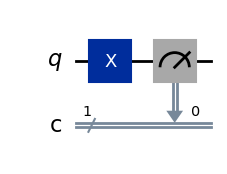

In [33]:
circuit.draw('mpl')

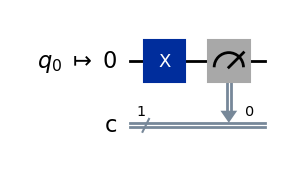

In [34]:
transpiled_circuit.draw('mpl',idle_wires=False)

In [35]:
sampler_real = Sampler(mode=backend_real)
job_sampler = sampler_real.run([(transpiled_circuit)],shots=1024)

In [36]:
sampler_real

In [37]:
print(f">>> Job Id: {job_sampler.job_id()}")
print(f">>> Job Id: {job_sampler.status()}")

>>> Job Id: d3h9lbc1nk1s739ob2r0
>>> Job Id: QUEUED


In [38]:
result_sampler = job_sampler.result()
result_sampler

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=1>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-10-05 16:20:15', stop='2025-10-05 16:20:19', size=1024>)])}, 'version': 2})

In [39]:
counts_real = result_sampler[0].data.c.get_counts()

In [40]:
counts_real

{'1': 849, '0': 175}

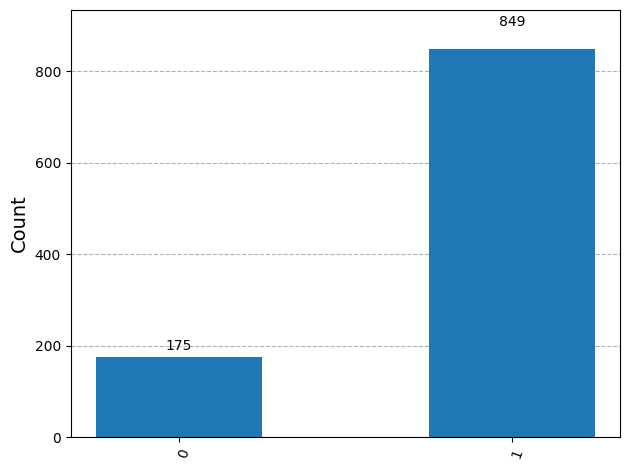

In [41]:
plot_histogram(counts_real)

# **Implementation of GATES**

# # Hadamard Gate

In [43]:
circuit =   QuantumCircuit(1,1)
circuit.h(0)
circuit.measure(0,0)

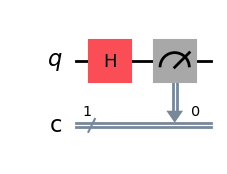

In [44]:
circuit.draw('mpl')

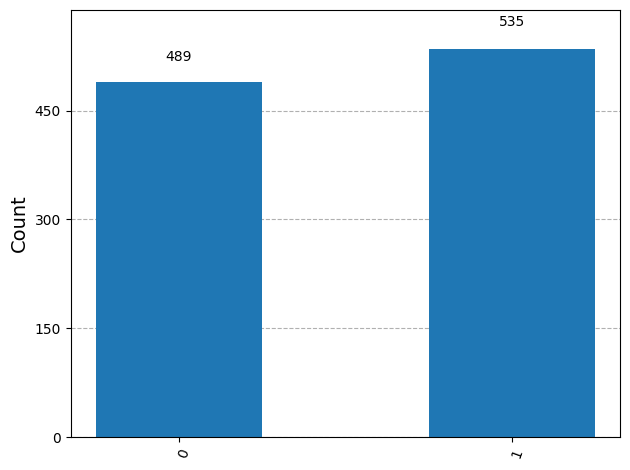

In [45]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(circuit, shots=1024)
counts = job.result().get_counts()
plot_histogram(counts)

# # Hadamard Gate (Pennylane)

In [47]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

In [ ]:
circuit =   QuantumCircuit(1,1)
circuit.h(0)
circuit.measure(0,0)

In [ ]:
psi = Statevector(circuit)

In [49]:
#00 + 11

circuit1 = QuantumCircuit(2,2)
circuit1.x(0)
circuit1.h(0)
circuit1.cx(0,1)
circuit1.measure(0,0)
circuit1.measure(1,1)


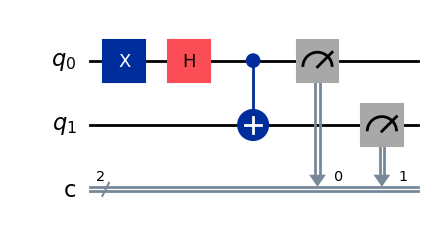

In [50]:
circuit1.draw('mpl')